<a href="https://colab.research.google.com/github/karenbennis/Xy/blob/analysis_visuals/Copy_of_yelp_reviews_visuals_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect to Database**

In [1]:
# Install Java, Spark, and Findspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

#Interact with SQL
!wget https://jdbc.postgresql.org/download/postgresql-42.2.9.jar

# Start Spark Session(Creating spark application with name defined by appName()) ---IMPORTED WITH EVERY COLAB NOTEBOOK
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("database_transformation").config("spark.driver.extraClassPath","/content/postgresql-42.2.9.jar").getOrCreate()

--2020-07-26 13:42:09--  https://jdbc.postgresql.org/download/postgresql-42.2.9.jar
Resolving jdbc.postgresql.org (jdbc.postgresql.org)... 72.32.157.228, 2001:4800:3e1:1::228
Connecting to jdbc.postgresql.org (jdbc.postgresql.org)|72.32.157.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 914037 (893K) [application/java-archive]
Saving to: ‘postgresql-42.2.9.jar’

postgresql-42.2.9.j 100%[===================>] 892.61K  4.75MB/s    in 0.2s    

2020-07-26 13:42:09 (4.75 MB/s) - ‘postgresql-42.2.9.jar’ saved [914037/914037]



In [2]:
# Authenticate user
from google.colab import auth
auth.authenticate_user()

In [3]:
# Set project id
project_id = 'xy-yelp'

In [4]:
# Set project
!gcloud config set project {project_id}

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey



In [5]:
# Get file which was saved to bucket **** file saves as multiple files so this should be addressed in the future, for now the 11mb file should be fine
!gsutil cp -r gs://xy-bucket/json_files/ml_j.json/part-00000-f8a8f21c-0ebe-434c-a8b3-a5c8988dd298-c000.json /tmp/machine_json.json

Copying gs://xy-bucket/json_files/ml_j.json/part-00000-f8a8f21c-0ebe-434c-a8b3-a5c8988dd298-c000.json...
- [1 files][ 62.5 MiB/ 62.5 MiB]                                                
Operation completed over 1 objects/62.5 MiB.                                     


In [6]:
# Set filepath to tmp folder where bucket file was saved **** this could actually be done without saving to the bucket, this is just done to make sure we can 
# save to and read from bucket if we need to
filepath = '/tmp/machine_json.json'

In [7]:
# Import pandas and read json file into DataFrame
import pandas as pd
raw_json = pd.read_csv('https://raw.githubusercontent.com/karenbennis/Xy/storyboard/uniform_yelp.csv')

In [8]:

#raw_json = pd.read_json(filepath, lines=True)

In [8]:
#Drop useless columns
raw_json=raw_json[['review_id','stars','text','cool','useful','funny','business_id','user_id']]

In [9]:
# Show dataframe
raw_json.head()

,review_id,stars,text,cool,useful,funny,business_id,user_id
0,f5pGCpvkpRpJixZ0zA3hCg,2,We went here three more times for lunch and tw...,0,0,0,caWUE0ItqsG51OaBVlr4Eg,8p2nss7UoZmIVZTr1IjR3w
1,8lPKsNFBiLmVL5nbsUXaZw,1,My husband and I went to the Drake for lunch t...,1,2,1,dc3uoAmNo5STqKV6mlD_aA,O3pSxv1SyHpY4qi4Q16KzA
2,CANhCLzOoZ0mkL3mpnUSNg,1,"Very Problematic\nI'm gay, I'm not ashamed to ...",0,0,0,sR9hPrIaG-J-GLcl4yaiLw,ffC9zmbY4pBOS9ByrWoXxQ
3,bZ02moAXlosgWPM3pXSHWw,3,Today was the first time I sat down a table. I...,0,0,0,NF6di6YcQxN0rDAleE7SyQ,zE49S2Em3l7vgIlvFzZFOw
4,TmIla5Eh5SSLJ_bKgH4Syg,2,I ordered chicken tacos with no cheese to go. ...,0,4,1,Wc9UpJhOcdSj7olZkz7SJA,xde2rO3XVt0Do8kLRIt2Dw


In [10]:
raw_json['length'] = raw_json['text'].apply(len)
raw_json.head()

,review_id,stars,text,cool,useful,funny,business_id,user_id,length
0,f5pGCpvkpRpJixZ0zA3hCg,2,We went here three more times for lunch and tw...,0,0,0,caWUE0ItqsG51OaBVlr4Eg,8p2nss7UoZmIVZTr1IjR3w,572
1,8lPKsNFBiLmVL5nbsUXaZw,1,My husband and I went to the Drake for lunch t...,1,2,1,dc3uoAmNo5STqKV6mlD_aA,O3pSxv1SyHpY4qi4Q16KzA,407
2,CANhCLzOoZ0mkL3mpnUSNg,1,"Very Problematic\nI'm gay, I'm not ashamed to ...",0,0,0,sR9hPrIaG-J-GLcl4yaiLw,ffC9zmbY4pBOS9ByrWoXxQ,483
3,bZ02moAXlosgWPM3pXSHWw,3,Today was the first time I sat down a table. I...,0,0,0,NF6di6YcQxN0rDAleE7SyQ,zE49S2Em3l7vgIlvFzZFOw,1682
4,TmIla5Eh5SSLJ_bKgH4Syg,2,I ordered chicken tacos with no cheese to go. ...,0,4,1,Wc9UpJhOcdSj7olZkz7SJA,xde2rO3XVt0Do8kLRIt2Dw,324


In [11]:
raw_json.dtypes

review_id      object
stars           int64
text           object
cool            int64
useful          int64
funny           int64
business_id    object
user_id        object
length          int64
dtype: object

In [12]:
raw_json['stars']=raw_json['stars'].astype(str)
raw_json.dtypes

review_id      object
stars          object
text           object
cool            int64
useful          int64
funny           int64
business_id    object
user_id        object
length          int64
dtype: object

In [13]:
stars_count = raw_json.stars.value_counts()
df = pd.DataFrame(stars_count).sort_index()
df.head()

,stars
1,999
2,998
3,1000
4,1000
5,999


**Visualizations**

(array([1998.,    0., 1999.,    0.,    0., 1995.,    0., 1998.,    0.,
        1995.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

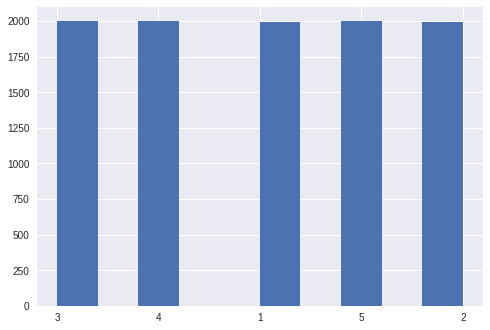

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.hist(raw_json['stars'])

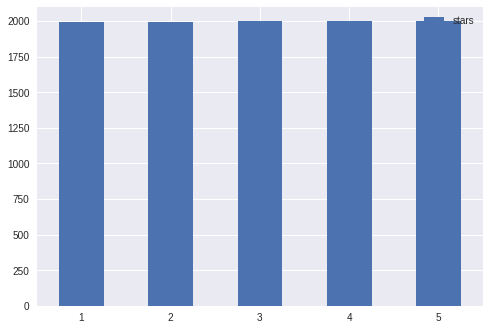

In [16]:
# import hvplot.pandas
df.plot.bar(rot=0)
plt.style.use('seaborn-dark-palette')
plt.show()

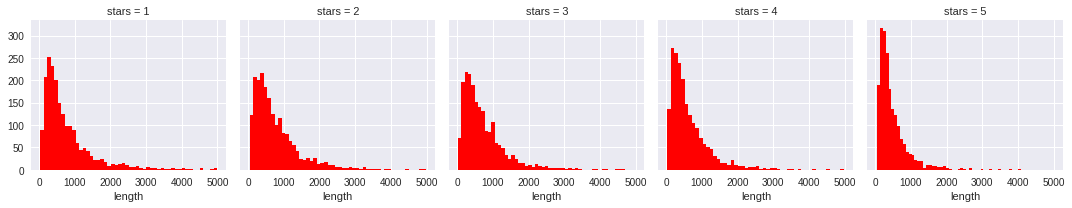

In [19]:
# COMPARING TEXT LENGTH TO STARS
import seaborn as sns
star_length_plot = sns.FacetGrid(data=raw_json,col='stars')
star_length_plot.map(plt.hist,'length',bins=50,color='r')

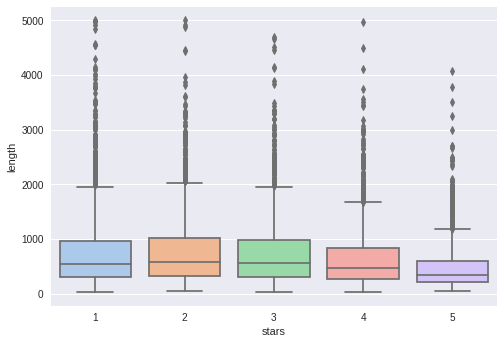

In [20]:
sns.boxplot(x="stars", y="length", data=raw_json, palette="pastel")

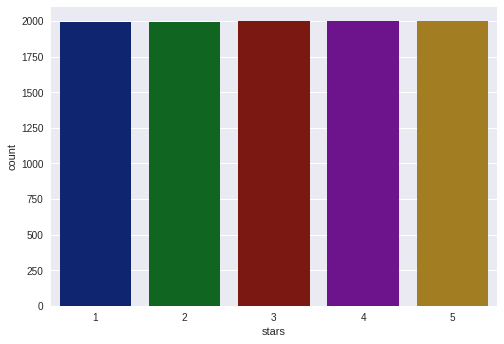

In [21]:
sns.countplot(raw_json["stars"])

In [22]:
review_metrics = raw_json.groupby("stars").mean()
review_metrics

,cool,useful,funny,length
stars,,,,
1,0.255138,2.382456,0.749875,781.269674
2,0.417043,1.590476,0.671679,769.613534
3,0.702703,1.420420,0.687187,731.121622
4,0.845923,1.337169,0.563782,635.483242
5,0.513013,0.986987,0.363363,472.911411


In [23]:
review_metrics = review_metrics[['length', 'cool', 'useful', 'funny']]
review_metrics

,length,cool,useful,funny
stars,,,,
1,781.269674,0.255138,2.382456,0.749875
2,769.613534,0.417043,1.590476,0.671679
3,731.121622,0.702703,1.420420,0.687187
4,635.483242,0.845923,1.337169,0.563782
5,472.911411,0.513013,0.986987,0.363363


In [24]:
review_metrics.corr()

,length,cool,useful,funny
length,1.000000,-0.330942,0.780337,0.985401
cool,-0.330942,1.000000,-0.648546,-0.298789
useful,0.780337,-0.648546,1.000000,0.818380
funny,0.985401,-0.298789,0.818380,1.000000


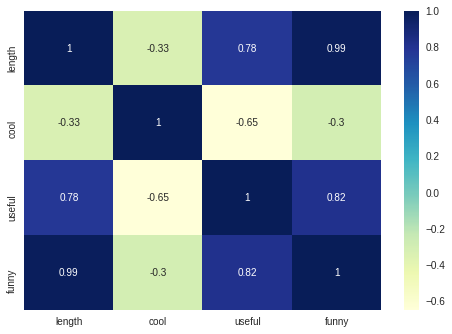

In [25]:
sns.heatmap(review_metrics.corr(), cmap="YlGnBu", annot=True)

In [23]:
df = raw_json.assign(Useful='No')
df.loc[raw_json['useful'] > 0, 'Useful'] = 'Yes'
df

,review_id,stars,text,cool,useful,funny,business_id,user_id,length,Useful
0,f5pGCpvkpRpJixZ0zA3hCg,2,We went here three more times for lunch and tw...,0,0,0,caWUE0ItqsG51OaBVlr4Eg,8p2nss7UoZmIVZTr1IjR3w,572,No
1,8lPKsNFBiLmVL5nbsUXaZw,1,My husband and I went to the Drake for lunch t...,1,2,1,dc3uoAmNo5STqKV6mlD_aA,O3pSxv1SyHpY4qi4Q16KzA,407,Yes
2,CANhCLzOoZ0mkL3mpnUSNg,1,"Very Problematic\nI'm gay, I'm not ashamed to ...",0,0,0,sR9hPrIaG-J-GLcl4yaiLw,ffC9zmbY4pBOS9ByrWoXxQ,483,No
3,bZ02moAXlosgWPM3pXSHWw,3,Today was the first time I sat down a table. I...,0,0,0,NF6di6YcQxN0rDAleE7SyQ,zE49S2Em3l7vgIlvFzZFOw,1682,No
4,TmIla5Eh5SSLJ_bKgH4Syg,2,I ordered chicken tacos with no cheese to go. ...,0,4,1,Wc9UpJhOcdSj7olZkz7SJA,xde2rO3XVt0Do8kLRIt2Dw,324,Yes
...,...,...,...,...,...,...,...,...,...,...
4991,zO9vGJr3bdDAc1hJp20J2g,4,Great hotel! I found a deal online and booked ...,0,0,2,El4FC8jcawUVgw_0EIcbaQ,Yizq12likvDS3wLr6cLxfQ,603,No
4992,y4IDdA1yDH8Nn7yPJf17_g,3,This place is great except for the deli. Manag...,0,0,0,2BzmHErUTVdaISvip7UV4A,BL6TZ0GYHjZxWiC4zg48ZQ,181,No
4993,7gQnEgWp2V6t3makhEjBbw,2,"Food is the same all around the country, but w...",0,0,0,lG4NNpcPWYSmLKEfBagnTw,mDNwsqCBRt2jhr7RIAA2cg,139,No
4994,T5uy8wvUgNG0r3PPPzGJww,4,"Just as all the other reviews say, the food wa...",0,0,0,nqTvE7ivdU23oUWdI01tOA,AOL0kZklABRH-TR3QD7yXw,449,No


In [27]:
# df.groupby('user_id').count()

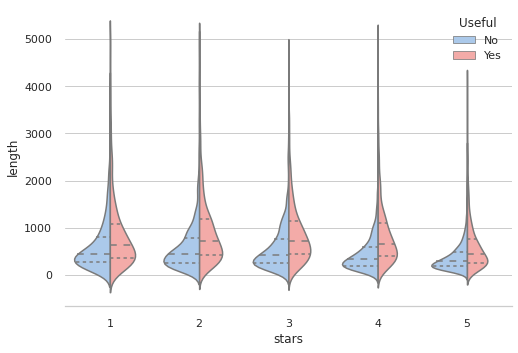

In [28]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="stars", y="length", hue="Useful",
               split=True, inner="quart",
               palette={"Yes": "r", "No": "b"},
               data=df)
sns.despine(left=True)

[None]

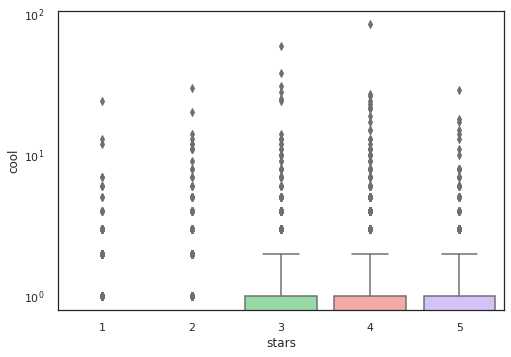

In [37]:
sns.boxplot(x="stars", y="cool", data=raw_json, palette="pastel").set(yscale="log")


[None]

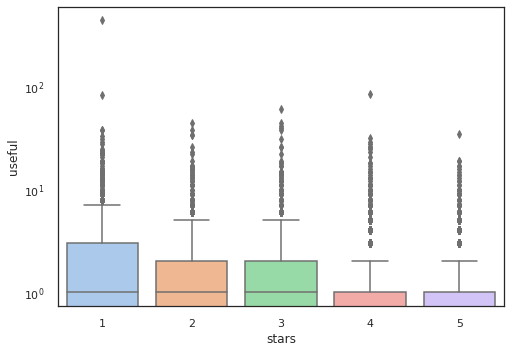

In [38]:
sns.boxplot(x="stars", y="useful", data=raw_json, palette="pastel").set(yscale="log")


[None]

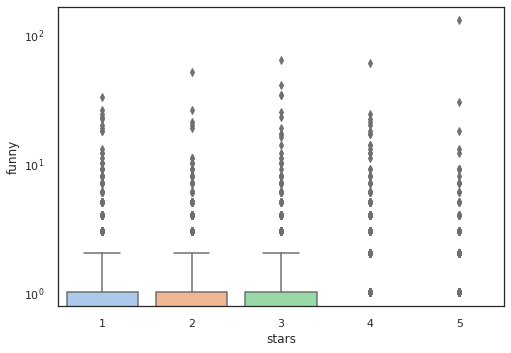

In [39]:
sns.boxplot(x="stars", y="funny", data=raw_json, palette="pastel").set(yscale="log")


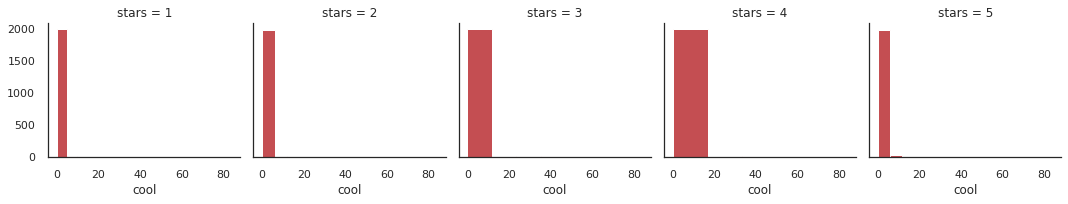

In [42]:
# COMPARING TEXT cool TO STARS
star_cool_plot = sns.FacetGrid(data=raw_json,col='stars')
star_cool_plot.map(plt.hist,'cool',bins=5,color='r')

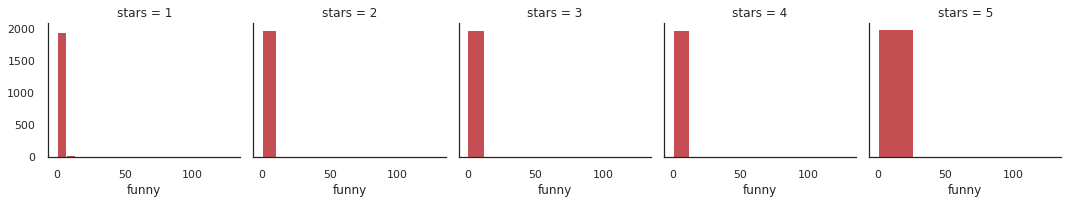

In [41]:
# COMPARING TEXT funny TO STARS
star_funny_plot = sns.FacetGrid(data=raw_json,col='stars')
star_funny_plot.map(plt.hist,'funny',bins=5,color='r')

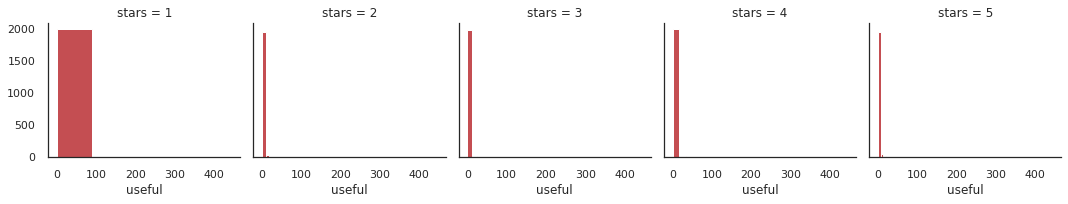

In [47]:
# COMPARING TEXT useful TO STARS
star_useful_plot = sns.FacetGrid(data=raw_json,col='stars')
star_useful_plot.map(plt.hist,'useful',bins=5, color='r')

In [48]:
raw_json['useful'].value_counts()

0      4929
1      2180
2      1139
3       577
4       353
5       225
6       137
7        94
8        75
9        60
11       39
10       37
15       22
12       16
13       14
14       12
17       10
16        9
19        7
22        6
18        6
26        5
23        4
38        4
25        2
24        2
31        2
34        2
28        2
21        2
29        2
45        2
42        1
83        1
33        1
40        1
32        1
61        1
445       1
86        1
35        1
Name: useful, dtype: int64

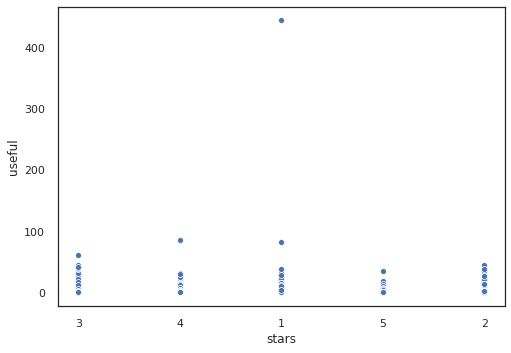

In [53]:
sns.scatterplot(x="stars", y="useful", data=raw_json, palette="pastel")

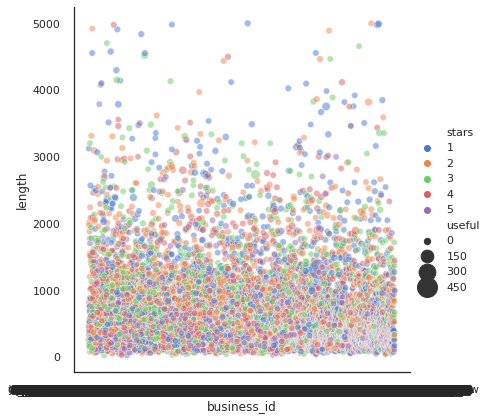

In [29]:
sns.set(style="white")

# Plot business id against length with other semantics
sns.relplot(x="business_id", y="length", hue="stars", size="useful",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

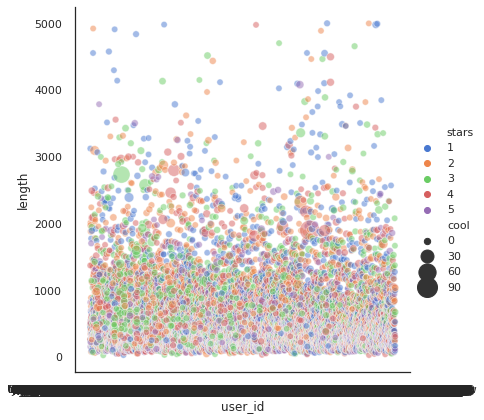

In [54]:
sns.set(style="white")

sns.relplot(x="user_id", y="length", hue="stars", size="cool",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

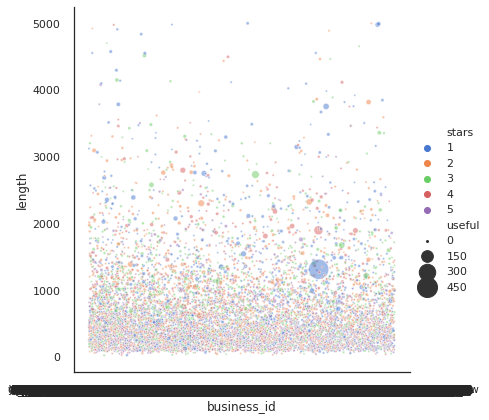

In [55]:
sns.set(style="white")

sns.relplot(x="business_id", y="length", hue="stars", size="useful",
            sizes=(4, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [14]:
import plotly.express as px
fig = px.histogram(raw_json, x="stars")
fig.show()

In [16]:
fig = px.box(raw_json, x="stars", y="length", points="all")
fig.show()

In [17]:
fig = px.box(raw_json, x="stars", y="length")
fig.show()

In [18]:
fig = px.box(raw_json, x="stars", y="useful", points="all")
fig.show()

In [20]:
fig = px.box(raw_json, x="stars", y="useful")
fig.show()

In [21]:
fig = px.box(raw_json, x="stars", y="funny", points="all")
fig.show()

In [22]:
fig = px.box(raw_json, x="stars", y="funny")
fig.show()

In [25]:
fig = px.box(df, x="stars", y="length", color="Useful")
fig.show()

In [26]:
import plotly.graph_objects as go

x = df['stars']

fig = go.Figure()

fig.add_trace(go.Box(
    y=df['length'],
    x=x,
    name='length',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=df['useful'],
    x=x,
    name='useful',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=df['funny'],
    x=x,
    name='funny',
    marker_color='#FF851B'
))

fig.add_trace(go.Box(
    y=df['cool'],
    x=x,
    name='cool',
    marker_color='#4285F4'
))

fig.update_layout(
    yaxis_title='reviews',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()

In [27]:
x = df['stars']

fig = go.Figure()

fig.add_trace(go.Box(
    y=df['useful'],
    x=x,
    name='useful',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=df['funny'],
    x=x,
    name='funny',
    marker_color='#FF851B'
))

fig.add_trace(go.Box(
    y=df['cool'],
    x=x,
    name='cool',
    marker_color='#4285F4'
))

fig.update_layout(
    yaxis_title='reviews',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()

In [37]:
fig = px.histogram(df, x="length", facet_col="stars"
       )
fig.show()